# Bundesliga Analyse

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import mysql.connector

## Daten Importieren

In [15]:
conn=mysql.connector.connect(host='localhost',port=int(3306),user='root',passwd='Roger123',db='fussballdata')

df=pd.read_sql_query("SELECT * FROM bundesliga ",conn)

df.head()

/var/folders/g8/k9tj64ws6m96zc6c40s8xc6m0000gn/T/ipykernel_10361/3879822241.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query("SELECT * FROM bundesliga ",conn)


,Liga,Saison,Spieltag,Heimteam,Gastteam,Endstand,Tore,Torzeit,Nachspielzeit
0,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:1,52,no
1,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:0,47,no
2,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,1:0,38,no
3,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,2:0,35,no
4,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,1:0,33,no


In [16]:


# Analyse der Torverteilung über die Spielzeit in verschiedenen Saisons
goal_distribution = df.groupby(['Saison', 'Torzeit']).size().unstack(fill_value=0)

# Anzeigen der Torverteilung
print(goal_distribution)

Torzeit    1    2    3    4    5    6    7    8    9    10   ...  92   93   \
Saison                                                       ...             
2014/2015    6    2    9    6    3    3    5   11    6    9  ...    0    0   
2015/2016    2    2    4    5    8    4    6    2    9    4  ...    1    0   
2016/2017    1    6    7   12    8   10    3    4    6    6  ...    2    0   
2017/2018    5    5    3    9   10    5    5    6    9    3  ...   10    9   
2018/2019    9    4    7    7    4    5    8    7    7   10  ...    6   17   
2019/2020    8    5    7    8    4   12   10    8   11    8  ...   10   14   
2020/2021    2    5    8    6    8    7   10    6   10   10  ...   12    9   
2021/2022    3    3   11    6   10    8   10    7    8    8  ...   10    9   
2022/2023    4    8    6    9   10   11    7   10    8   10  ...   14   14   

Torzeit    94   95   96   97   98   99   100  102  
Saison                                             
2014/2015    0    0    0    0    0   

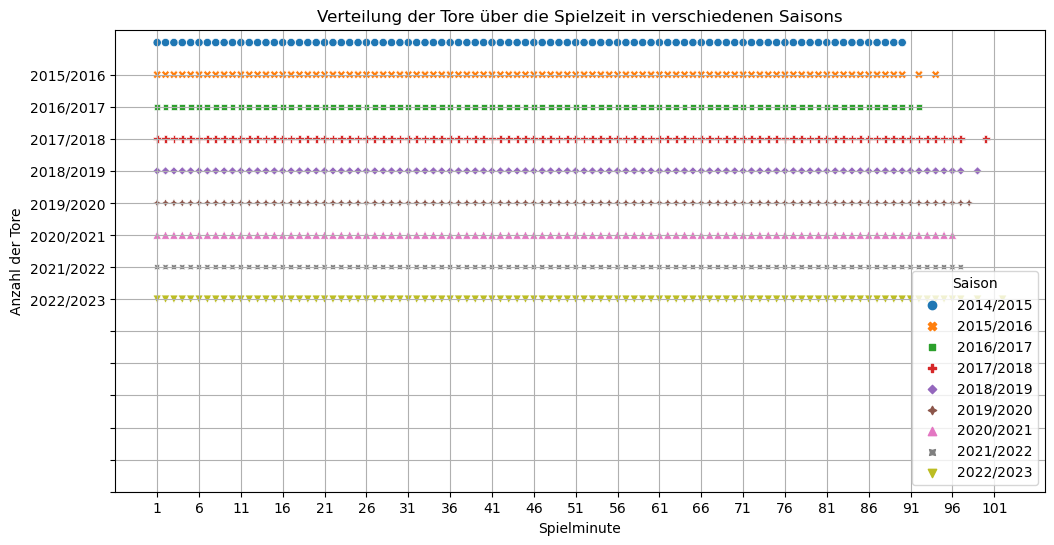

In [18]:
# Vorbereitung der Daten für das Scatterplot
scatter_data = df.groupby(['Saison', 'Torzeit']).size().reset_index(name='goals')

# Erstellen des Scatterplots
plt.figure(figsize = (12,6))
sns.scatterplot(data=scatter_data, x='Torzeit', y='Saison', hue='Saison', style='Saison')
plt.title('Verteilung der Tore über die Spielzeit in verschiedenen Saisons')
plt.xlabel('Spielminute')
plt.ylabel('Anzahl der Tore')
plt.xticks(range(1, 105, 5))  # Setzen der X-Achsen-Ticks alle 5 Minuten
plt.yticks(range(1, 15, 1))
plt.grid()
plt.show()

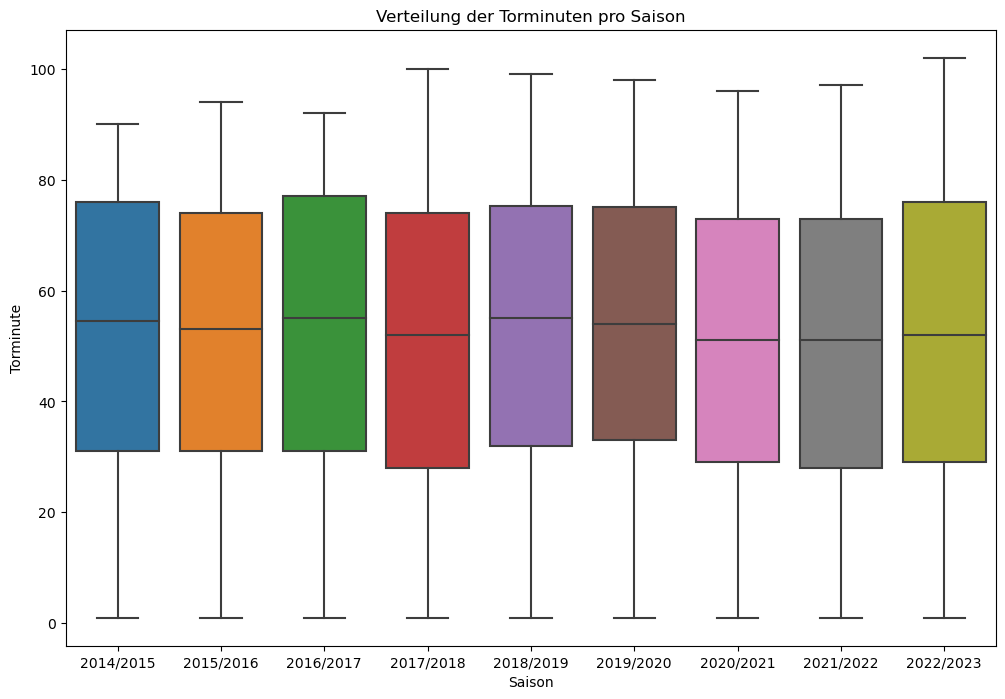

In [ ]:
# Erstellen der Boxplots für jede Saison
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Saison', y='Torzeit')
plt.title('Verteilung der Torminuten pro Saison')
plt.xlabel('Saison')
plt.ylabel('Torminute')
plt.show()


([<matplotlib.axis.XTick at 0x152c9bc50>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96'),
  Text(101, 0, '101')])

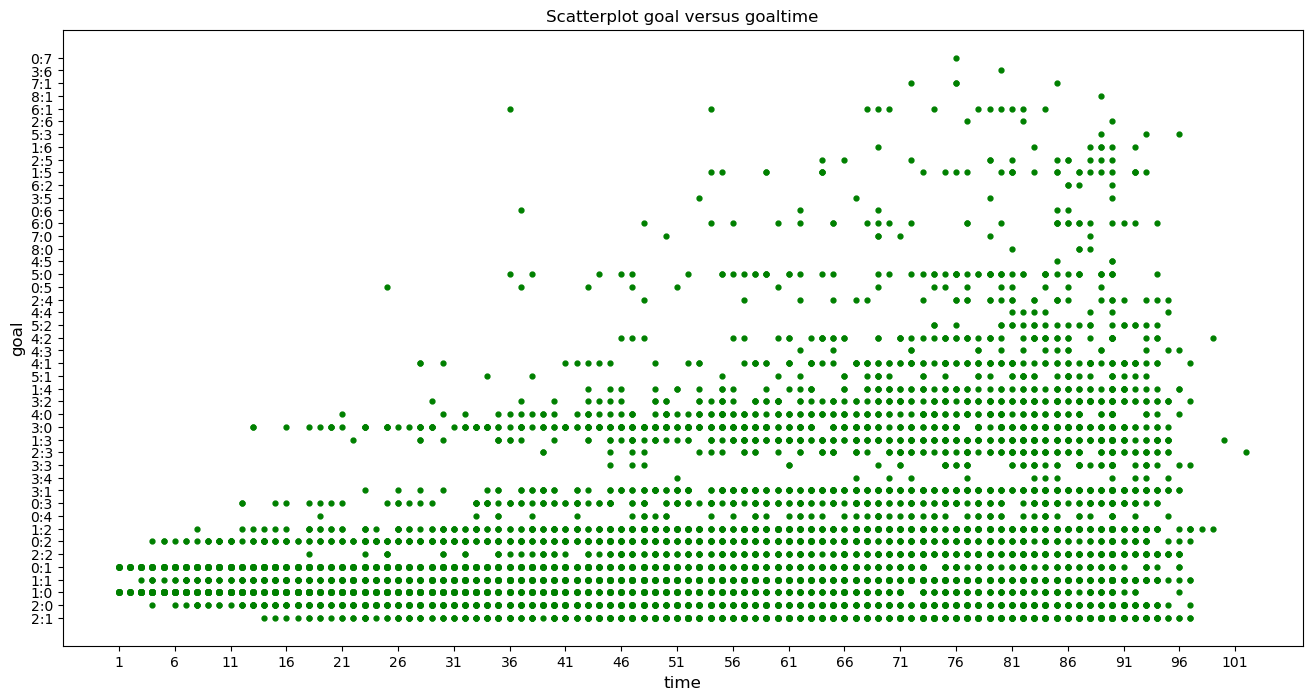

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Torzeit'], 
         df['Tore'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot goal versus goaltime', fontsize=12)
plt.ylabel('goal', fontsize=12)
plt.xlabel('time', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(1,102,5))

In [ ]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

NameError: name 'residuals' is not defined

<Figure size 700x400 with 0 Axes>